## Confidence interval

Construct CI using sample estimate and parametric model

In [ ]:
import numpy as np
from scipy.stats import poisson

In [ ]:
# generate from measured sample
B = 1000
sample = np.array([4, 4, 5, 8, 3, 8, 9, 6, 6, 2])
x = poisson.rvs(sample.mean(), size=len(sample) * B).reshape(B, -1)
print("shape: ", x.shape)
print("first three batches: \n", x[:3])

shape:  (1000, 10)
first three batches: 
 [[ 2  7  4  3  3  3  8  9  5  7]
 [ 5  8  2  5  2 11  7  6  4  4]
 [ 4  8  7  2  8  7  7  6  3  6]]


In [ ]:
delta_b = x.mean(axis=1) - sample.mean()
len(delta_b), delta_b[:3]

(1000, array([-0.7, -0.1,  0.6]))

In [ ]:
alpha = 0.1
L, U = np.percentile(delta_b, [100*alpha/2, 100*(1-alpha/2)])
L, U

(-1.2000000000000002, 1.2000000000000002)

In [ ]:
CI = (sample.mean() - U, sample.mean() - L)
CI

(4.3, 6.7)

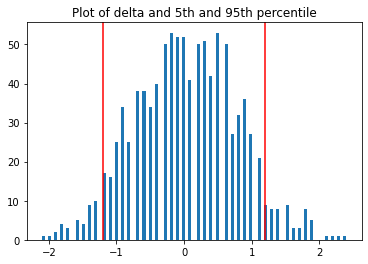

In [ ]:
import matplotlib.pyplot as plt
plt.hist(delta_b, bins=100)
plt.axvline(x = L, color = 'r')
plt.axvline(x = U, color = 'r')
plt.title('Plot of delta and 5th and 95th percentile')
plt.show()

Construct CI with resampling

In [ ]:
y = np.random.choice(sample, size=[B, len(sample)])
len(y), y[:3]

(1000, array([[2, 2, 4, 3, 6, 6, 6, 5, 6, 2],
        [6, 2, 6, 2, 8, 4, 8, 5, 6, 8],
        [4, 2, 3, 8, 3, 2, 8, 8, 4, 3]]))

In [ ]:
d_b = y.mean(axis=1) - sample.mean()
len(d_b), d_b[:3]

(1000, array([-1.3,  0. , -1. ]))

In [ ]:
alpha = 0.1
l, u = np.percentile(d_b, [100*alpha/2, 100*(1-alpha/2)])
l, u

(-1.0999999999999996, 1.2000000000000002)

In [ ]:
ci = (sample.mean() - u, sample.mean() - l)
ci

(4.3, 6.6)

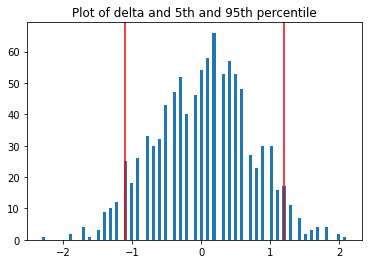

In [ ]:
plt.hist(d_b, bins=100)
plt.axvline(x = l, color = 'r')
plt.axvline(x = u, color = 'r')
plt.title('Plot of delta and 5th and 95th percentile')
plt.show()